In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [65]:
sns.set(style="whitegrid")

In [66]:
train_df = pd.read_csv("train.csv")   # Titanic dataset
test_df = pd.read_csv("test.csv")

In [67]:
train_df.head() # First few rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
train_df.isnull().sum() # Null value count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
train_df.info()  # Data types and null values
train_df.describe()  # Statistical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


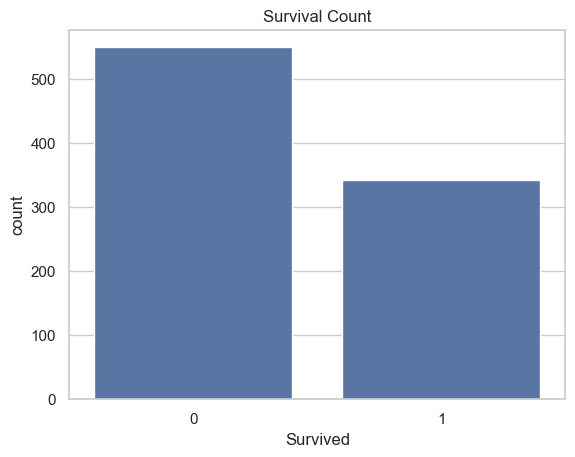

In [70]:
sns.countplot(data=train_df, x='Survived')
plt.title("Survival Count")
plt.show()

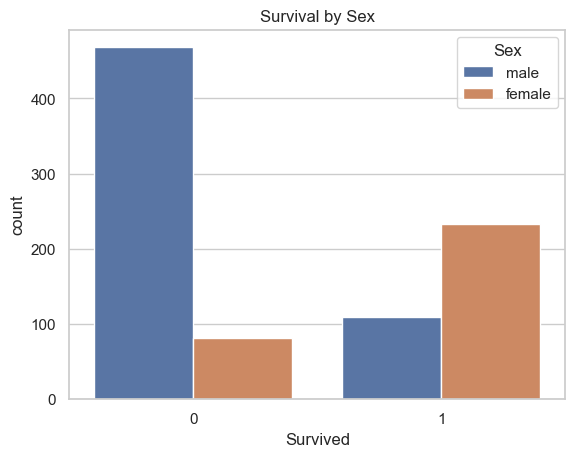

In [71]:
sns.countplot(data=train_df, x='Survived', hue='Sex')
plt.title("Survival by Sex")
plt.show()

<Axes: xlabel='Sex'>

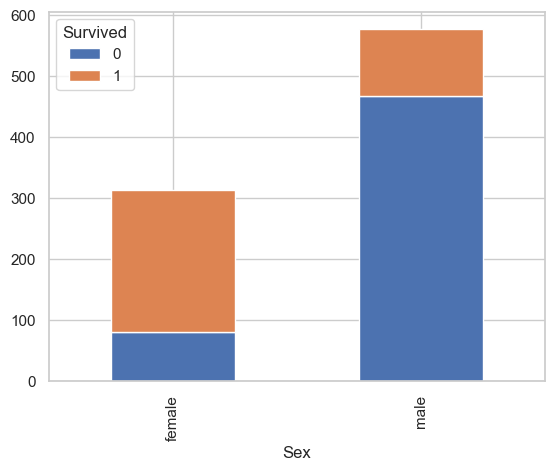

In [75]:
pd.crosstab(train_df['Sex'], train_df['Survived']).plot(kind='bar', stacked=True)

In [ ]:
Females had a higher survival rate than males.

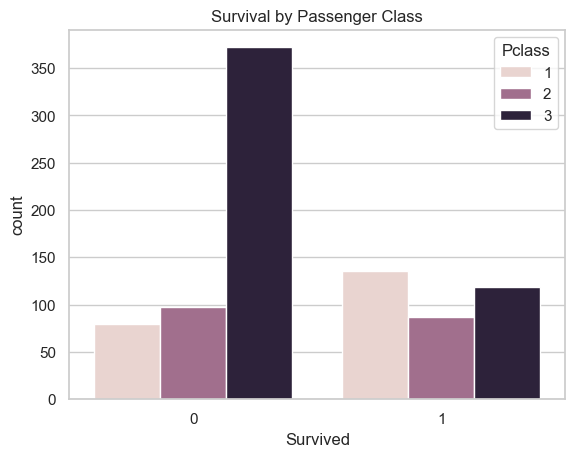

In [76]:
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title("Survival by Passenger Class")
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

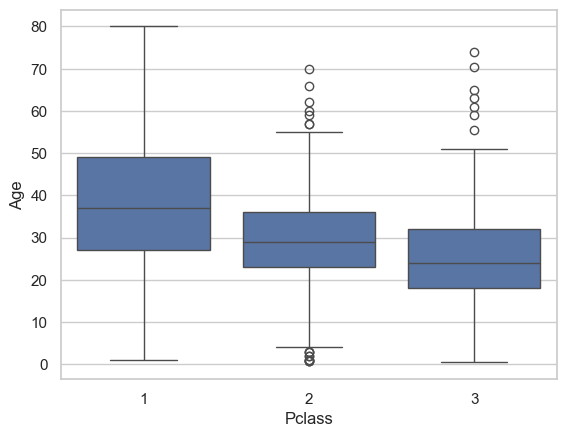

In [77]:
sns.boxplot(x='Pclass', y='Age', data=train_df)

<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Count'>

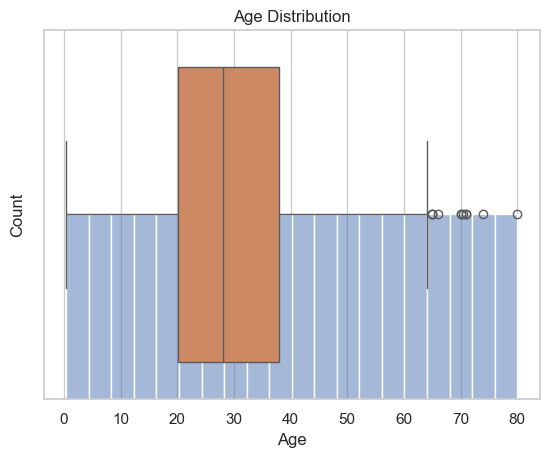

In [78]:
sns.histplot(data=train_df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
sns.boxplot(x='Age', data=train_df)

In [ ]:
Most passengers were between 20–40 years old. There are outliers present in the Age column.

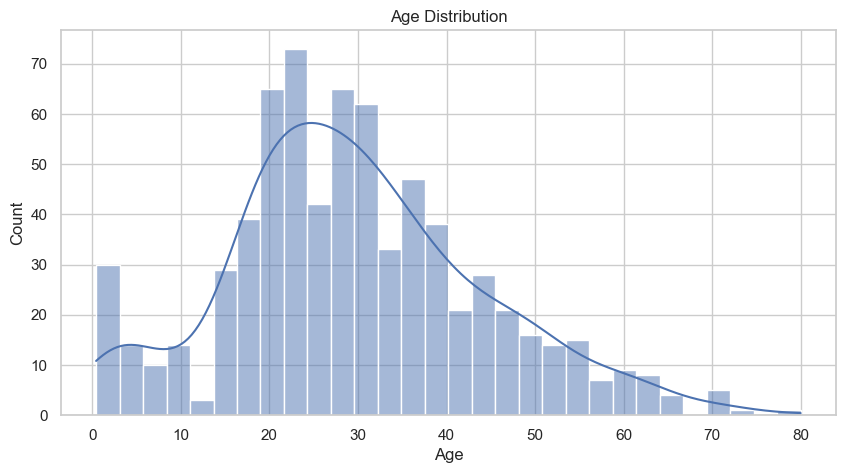

In [80]:
plt.figure(figsize=(10,5))
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

In [81]:
if 'Embarked' in train_df.columns:
    train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
if 'Age' in train_df.columns:
    train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
if 'Cabin' in train_df.columns:
    train_df.drop('Cabin', axis=1, inplace=True)

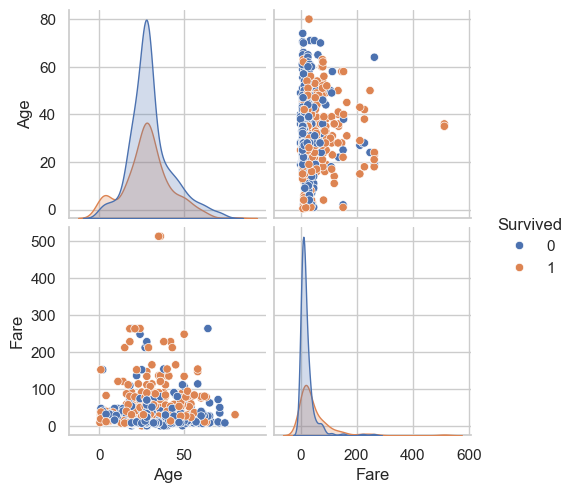

In [82]:
sns.pairplot(train_df[['Age', 'Fare', 'Survived']], hue='Survived')

In [84]:
non_numeric_cols = train_df.select_dtypes(include=['object']).columns
correlation_df = train_df.drop(columns=non_numeric_cols)

In [85]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1}) # Convert 'Sex' to 0 (male) and 1 (female)

In [86]:
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True) # One-hot encoding for 'Embarked'

<Axes: >

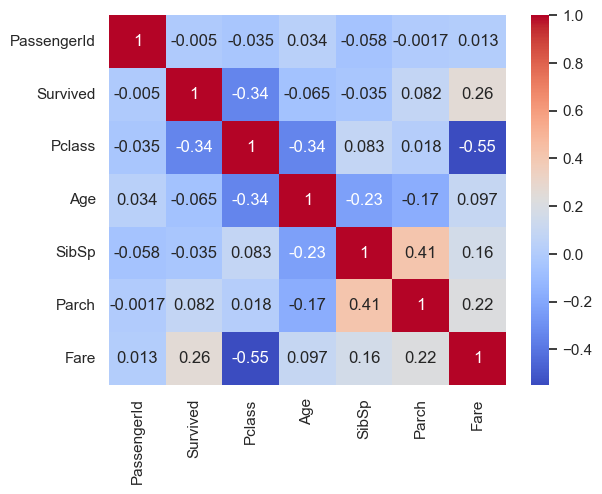

In [87]:
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm')

In [ ]:
Fare is positively correlated with survival, while Pclass is negatively correlated.

In [88]:
print("\n--- TEST CASES ---")
print("Test 1 - No missing Age values:", train_df['Age'].isnull().sum() == 0)
print("Test 2 - No missing Embarked values:", train_df['Embarked_Q'].isnull().sum() == 0 and train_df['Embarked_S'].isnull().sum() == 0)
print("Test 3 - Sex mapped correctly (0 and 1 only):", set(train_df['Sex'].unique()) == {0, 1})
print("Test 4 - Cabin column removed:", 'Cabin' not in train_df.columns)
print("Test 5 - Dummy variables created:", 'Embarked_Q' in train_df.columns and 'Embarked_S' in train_df.columns)


--- TEST CASES ---
Test 1 - No missing Age values: True
Test 2 - No missing Embarked values: True
Test 3 - Sex mapped correctly (0 and 1 only): True
Test 4 - Cabin column removed: True
Test 5 - Dummy variables created: True


In [90]:
X = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = train_df['Survived']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [93]:
print("\n--- Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))


--- Model Evaluation ---
Accuracy: 0.8100558659217877

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [94]:
# 10. Summary of Findings
print("\n--- Summary of Findings ---")
print("\nPatterns Observed:")
print("- Majority of passengers were in 3rd class.")
print("- More males were on board than females.")
print("- Most survivors were women and children.")

print("\nImportant Relationships:")
print("- 'Sex' and 'Survived' are strongly related. Females had a higher survival rate.")
print("- 'Pclass' and 'Survived' show that higher class passengers were more likely to survive.")
print("- Higher 'Fare' values also corresponded with higher survival rates.")

print("\nAnomalies Detected:")
print("- Missing values were found in 'Age', 'Embarked', and 'Cabin'.")
print("- The 'Cabin' feature was dropped due to excessive missing data.")

print("\nFinal Thoughts:")
print("- Logistic Regression provides a decent baseline model for predicting survival.")
print("- Further model improvement could involve feature engineering or ensemble models.")


--- Summary of Findings ---

Patterns Observed:
- Majority of passengers were in 3rd class.
- More males were on board than females.
- Most survivors were women and children.

Important Relationships:
- 'Sex' and 'Survived' are strongly related. Females had a higher survival rate.
- 'Pclass' and 'Survived' show that higher class passengers were more likely to survive.
- Higher 'Fare' values also corresponded with higher survival rates.

Anomalies Detected:
- Missing values were found in 'Age', 'Embarked', and 'Cabin'.
- The 'Cabin' feature was dropped due to excessive missing data.

Final Thoughts:
- Logistic Regression provides a decent baseline model for predicting survival.
- Further model improvement could involve feature engineering or ensemble models.
